<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize</a></span></li><li><span><a href="#Configure-daaset-for-performance" data-toc-modified-id="Configure-daaset-for-performance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Configure daaset for performance</a></span></li><li><span><a href="#Standarize-the-data" data-toc-modified-id="Standarize-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Standarize the data</a></span></li><li><span><a href="#Create-the-model" data-toc-modified-id="Create-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create the model</a></span></li><li><span><a href="#Model-summary" data-toc-modified-id="Model-summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model summary</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train the model</a></span></li></ul></div>

In [3]:
import matplotlib.pyplot as plt
import numpy
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 108s 0us/step


In [5]:
print(len(list(data_dir.glob('*/*.jpg'))))

3670


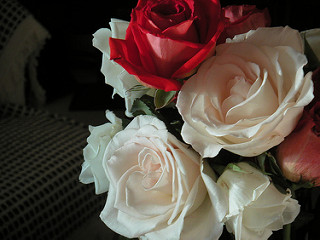

In [8]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

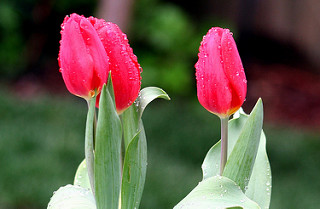

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## Data Load

In [11]:
batch_size = 32
img_height = 180
img_width  = 180

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


## Visualize

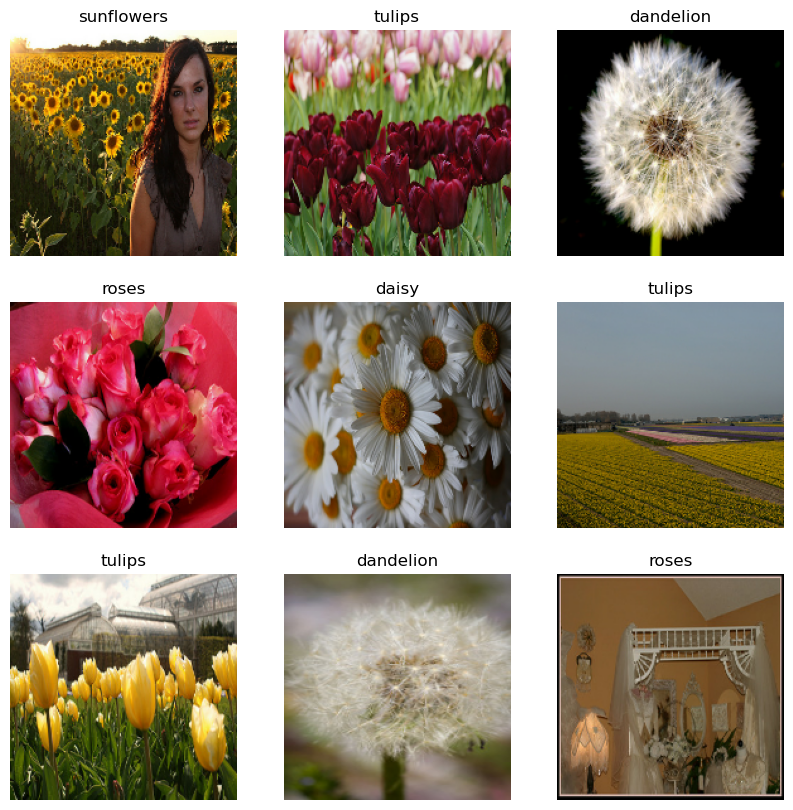

In [18]:
class_name = train_ds.class_names
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

## Configure daaset for performance

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standarize the data

In [22]:
normalization_layer = layers.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(numpy.min(first_image), numpy.max(first_image))

0.0 1.0


## Create the model

In [27]:
num_classes = len(class_name)
print(num_classes)

5


In [28]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width, 3)),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['Accuracy'])

## Model summary

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Train the model

In [32]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 260s 3s/step - loss: 1.4403 - Accuracy: 0.3774 - val_loss: 1.1679 - val_Accuracy: 0.5136
Epoch 2/10
92/92 [==============================] - 218s 2s/step - loss: 1.0193 - Accuracy: 0.5960 - val_loss: 1.0053 - val_Accuracy: 0.6076
Epoch 3/10
92/92 [==============================] - 217s 2s/step - loss: 0.8632 - Accuracy: 0.6737 - val_loss: 0.9623 - val_Accuracy: 0.6267
Epoch 4/10
92/92 [==============================] - 217s 2s/step - loss: 0.6894 - Accuracy: 0.7398 - val_loss: 1.0370 - val_Accuracy: 0.6294
Epoch 5/10
92/92 [==============================] - 205s 2s/step - loss: 0.4917 - Accuracy: 0.8215 - val_loss: 0.9768 - val_Accuracy: 0.6226
Epoch 6/10
92/92 [==============================] - 205s 2s/step - loss: 0.3355 - Accuracy: 0.8818 - val_loss: 1.1086 - val_Accuracy: 0.6240
Epoch 7/10
92/92 [==============================] - 218s 2s/step - loss: 0.1973 - Accuracy: 0.9339 - val_loss: 1.3628 - val_Accuracy: 0.6226
Epoch 8/10
92

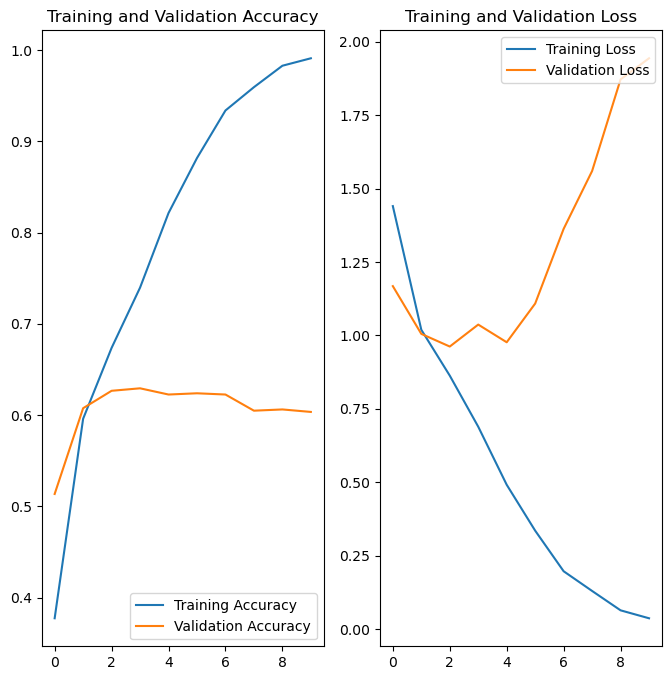

In [36]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [37]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                         input_shape=(img_height,
                                     img_width,
                                     3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

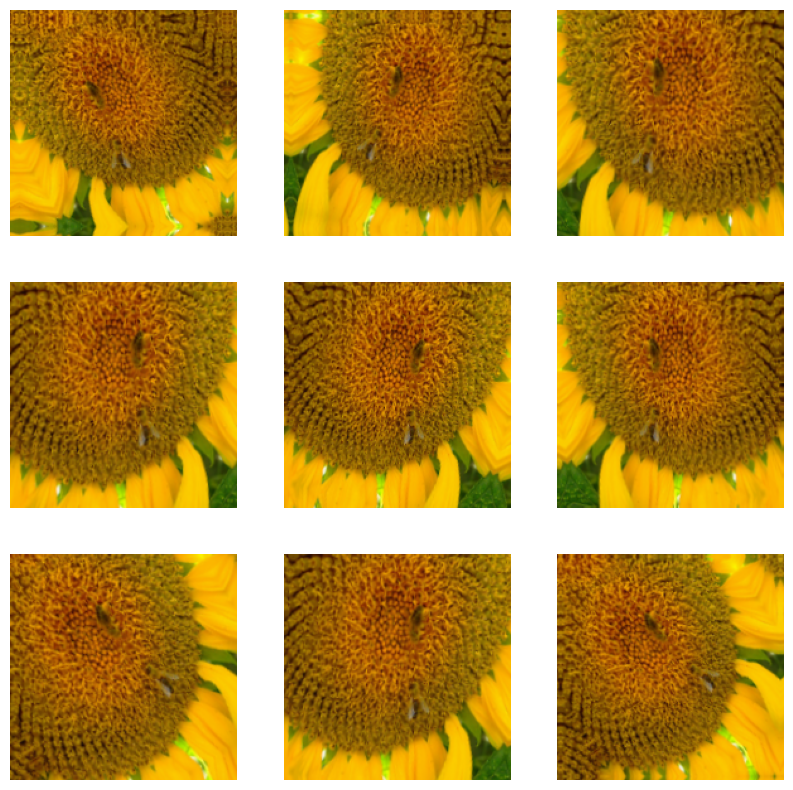

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [39]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [40]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [43]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 270s 3s/step - loss: 1.3913 - accuracy: 0.3965 - val_loss: 1.2013 - val_accuracy: 0.5014
Epoch 2/15
92/92 [==============================] - 246s 3s/step - loss: 1.0823 - accuracy: 0.5688 - val_loss: 1.0146 - val_accuracy: 0.6090
Epoch 3/15
92/92 [==============================] - 243s 3s/step - loss: 0.9764 - accuracy: 0.6134 - val_loss: 1.0118 - val_accuracy: 0.5926
Epoch 4/15
92/92 [==============================] - 238s 3s/step - loss: 0.8671 - accuracy: 0.6625 - val_loss: 1.0458 - val_accuracy: 0.5899
Epoch 5/15
92/92 [==============================] - 224s 2s/step - loss: 0.8093 - accuracy: 0.6955 - val_loss: 0.9210 - val_accuracy: 0.6253
Epoch 6/15
92/92 [==============================] - 226s 2s/step - loss: 0.7592 - accuracy: 0.6999 - val_loss: 0.7889 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 224s 2s/step - loss: 0.7312 - accuracy: 0.7183 - val_loss: 0.7784 - val_accuracy: 0.6962
Epoch 8/15
92

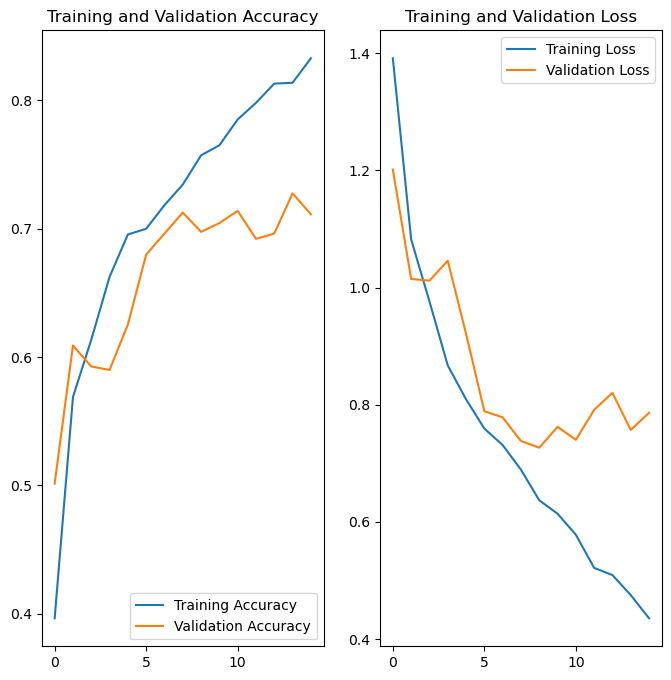

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 89ms/step
This image most likely belongs to sunflowers with a 94.69 percent confidence.
